In [20]:
#Importing libraries
import keras,os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#Load Images
raw=pd.read_csv("train.csv")

In [22]:
raw

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train_valid=raw.drop(["label"],axis=1)


In [24]:
from keras.utils.np_utils import to_categorical 

y=to_categorical(raw["label"].values, num_classes = 10)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [25]:
train_valid.shape

(42000, 784)

In [26]:
X = train_valid.values.reshape(42000, 28, 28)/ 255.0
X = X.reshape(-1,28,28,1)

In [27]:
X.shape

(42000, 28, 28, 1)

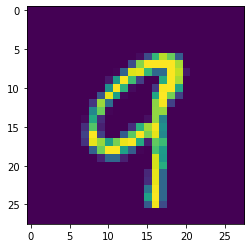

In [28]:
plt.imshow(X[-1]);

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [31]:
train_dataset=tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(1000)
valid_dataset=tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(1000)
train_dataset

<BatchDataset shapes: ((None, 28, 28, 1), (None, 10)), types: (tf.float64, tf.float32)>

In [32]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=16,kernel_size=(2,2),padding="same", activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), padding='same',strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), padding='same',strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), padding='same',strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), padding='same',strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), padding='same',strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [33]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          1

In [34]:

from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('VGG16_modif_best.h5', verbose=1, monitor='val_accuracy', save_best_only=True, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


In [16]:
hist = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), steps_per_epoch=20,batch_size=1000,
                           epochs=1000,callbacks=[checkpoint])

Epoch 1/1000
20/20 [==============================] - ETA: 0s - loss: 2.2922 - accuracy: 0.1099
Epoch 00001: val_accuracy improved from -inf to 0.11143, saving model to VGG16_modif_best.h5
20/20 [==============================] - 16s 805ms/step - loss: 2.2922 - accuracy: 0.1099 - val_loss: 2.2794 - val_accuracy: 0.1114
Epoch 2/1000
20/20 [==============================] - ETA: 0s - loss: 2.2967 - accuracy: 0.1003
Epoch 00002: val_accuracy improved from 0.11143 to 0.15429, saving model to VGG16_modif_best.h5
20/20 [==============================] - 15s 773ms/step - loss: 2.2967 - accuracy: 0.1003 - val_loss: 2.2757 - val_accuracy: 0.1543
Epoch 3/1000
20/20 [==============================] - ETA: 0s - loss: 2.2512 - accuracy: 0.1419
Epoch 00003: val_accuracy did not improve from 0.15429
20/20 [==============================] - 16s 807ms/step - loss: 2.2512 - accuracy: 0.1419 - val_loss: 2.1240 - val_accuracy: 0.1114
Epoch 4/1000
20/20 [==============================] - ETA: 0s - loss: 2.

20/20 [==============================] - ETA: 0s - loss: 0.0484 - accuracy: 0.9856
Epoch 00055: val_accuracy did not improve from 0.98512
20/20 [==============================] - 16s 799ms/step - loss: 0.0484 - accuracy: 0.9856 - val_loss: 0.0637 - val_accuracy: 0.9831
Epoch 56/1000
20/20 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9877
Epoch 00056: val_accuracy improved from 0.98512 to 0.98607, saving model to VGG16_modif_best.h5
20/20 [==============================] - 17s 842ms/step - loss: 0.0424 - accuracy: 0.9877 - val_loss: 0.0544 - val_accuracy: 0.9861
Epoch 57/1000
20/20 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9892
Epoch 00057: val_accuracy did not improve from 0.98607
20/20 [==============================] - 16s 785ms/step - loss: 0.0387 - accuracy: 0.9892 - val_loss: 0.0992 - val_accuracy: 0.9763
Epoch 58/1000
20/20 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9810
Epoch 00058: val_accurac

Epoch 84/1000
20/20 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9906
Epoch 00084: val_accuracy did not improve from 0.98726
20/20 [==============================] - 16s 787ms/step - loss: 0.0344 - accuracy: 0.9906 - val_loss: 0.0655 - val_accuracy: 0.9854
Epoch 85/1000
20/20 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.9923
Epoch 00085: val_accuracy did not improve from 0.98726
20/20 [==============================] - 15s 765ms/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.0979 - val_accuracy: 0.9832
Epoch 86/1000
20/20 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9904
Epoch 00086: val_accuracy did not improve from 0.98726
20/20 [==============================] - 17s 851ms/step - loss: 0.0375 - accuracy: 0.9904 - val_loss: 0.0647 - val_accuracy: 0.9835
Epoch 87/1000
20/20 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9911
Epoch 00087: val_accuracy did not improve from 0.98

Epoch 113/1000
20/20 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9928
Epoch 00113: val_accuracy did not improve from 0.98726
20/20 [==============================] - 16s 808ms/step - loss: 0.0250 - accuracy: 0.9928 - val_loss: 0.0828 - val_accuracy: 0.9864
Epoch 114/1000
20/20 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9936
Epoch 00114: val_accuracy did not improve from 0.98726
20/20 [==============================] - 16s 812ms/step - loss: 0.0247 - accuracy: 0.9936 - val_loss: 0.0835 - val_accuracy: 0.9837
Epoch 115/1000
20/20 [==============================] - ETA: 0s - loss: 0.0290 - accuracy: 0.9922
Epoch 00115: val_accuracy did not improve from 0.98726
20/20 [==============================] - 18s 893ms/step - loss: 0.0290 - accuracy: 0.9922 - val_loss: 0.0864 - val_accuracy: 0.9849
Epoch 116/1000
20/20 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9815
Epoch 00116: val_accuracy did not improve from 

Epoch 142/1000
20/20 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9920
Epoch 00142: val_accuracy did not improve from 0.98726
20/20 [==============================] - 16s 798ms/step - loss: 0.0345 - accuracy: 0.9920 - val_loss: 0.1255 - val_accuracy: 0.9812
Epoch 143/1000
20/20 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9906
Epoch 00143: val_accuracy did not improve from 0.98726
20/20 [==============================] - 16s 796ms/step - loss: 0.0391 - accuracy: 0.9906 - val_loss: 0.0968 - val_accuracy: 0.9800
Epoch 144/1000
20/20 [==============================] - ETA: 0s - loss: 0.0483 - accuracy: 0.9891
Epoch 00144: val_accuracy did not improve from 0.98726
20/20 [==============================] - 17s 837ms/step - loss: 0.0483 - accuracy: 0.9891 - val_loss: 0.0746 - val_accuracy: 0.9842
Epoch 145/1000
20/20 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9923
Epoch 00145: val_accuracy improved from 0.98726

Epoch 171/1000
20/20 [==============================] - ETA: 0s - loss: 0.0315 - accuracy: 0.9921
Epoch 00171: val_accuracy did not improve from 0.98762
20/20 [==============================] - 16s 806ms/step - loss: 0.0315 - accuracy: 0.9921 - val_loss: 0.0872 - val_accuracy: 0.9854
Epoch 172/1000
20/20 [==============================] - ETA: 0s - loss: 0.0283 - accuracy: 0.9933
Epoch 00172: val_accuracy did not improve from 0.98762
20/20 [==============================] - 17s 842ms/step - loss: 0.0283 - accuracy: 0.9933 - val_loss: 0.0718 - val_accuracy: 0.9874
Epoch 173/1000
20/20 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9956
Epoch 00173: val_accuracy did not improve from 0.98762
20/20 [==============================] - 16s 794ms/step - loss: 0.0223 - accuracy: 0.9956 - val_loss: 0.0996 - val_accuracy: 0.9840
Epoch 174/1000
20/20 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9954
Epoch 00174: val_accuracy did not improve from 

Epoch 200/1000
20/20 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9958
Epoch 00200: val_accuracy did not improve from 0.98786
20/20 [==============================] - 17s 838ms/step - loss: 0.0164 - accuracy: 0.9958 - val_loss: 0.0900 - val_accuracy: 0.9867
Epoch 201/1000
20/20 [==============================] - ETA: 0s - loss: 0.0577 - accuracy: 0.9903
Epoch 00201: val_accuracy did not improve from 0.98786
20/20 [==============================] - 17s 852ms/step - loss: 0.0577 - accuracy: 0.9903 - val_loss: 0.1102 - val_accuracy: 0.9787
Epoch 202/1000
20/20 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.9873
Epoch 00202: val_accuracy did not improve from 0.98786
20/20 [==============================] - 16s 821ms/step - loss: 0.0572 - accuracy: 0.9873 - val_loss: 0.0841 - val_accuracy: 0.9863
Epoch 203/1000
20/20 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9918
Epoch 00203: val_accuracy did not improve from 

Epoch 229/1000
20/20 [==============================] - ETA: 0s - loss: 0.0764 - accuracy: 0.9872
Epoch 00229: val_accuracy did not improve from 0.98786
20/20 [==============================] - 16s 790ms/step - loss: 0.0764 - accuracy: 0.9872 - val_loss: 0.1977 - val_accuracy: 0.9749
Epoch 230/1000
20/20 [==============================] - ETA: 0s - loss: 0.2615 - accuracy: 0.9759
Epoch 00230: val_accuracy did not improve from 0.98786
20/20 [==============================] - 16s 801ms/step - loss: 0.2615 - accuracy: 0.9759 - val_loss: 0.3300 - val_accuracy: 0.9317
Epoch 231/1000
20/20 [==============================] - ETA: 0s - loss: 0.2377 - accuracy: 0.9811
Epoch 00231: val_accuracy did not improve from 0.98786
20/20 [==============================] - 16s 789ms/step - loss: 0.2377 - accuracy: 0.9811 - val_loss: 0.2746 - val_accuracy: 0.9811
Epoch 232/1000
20/20 [==============================] - ETA: 0s - loss: 0.2338 - accuracy: 0.9837
Epoch 00232: val_accuracy did not improve from 

Epoch 258/1000
20/20 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9924
Epoch 00258: val_accuracy did not improve from 0.98786
20/20 [==============================] - 16s 817ms/step - loss: 0.0391 - accuracy: 0.9924 - val_loss: 0.1102 - val_accuracy: 0.9842
Epoch 259/1000
20/20 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9934
Epoch 00259: val_accuracy did not improve from 0.98786
20/20 [==============================] - 16s 783ms/step - loss: 0.0262 - accuracy: 0.9934 - val_loss: 0.0958 - val_accuracy: 0.9879
Epoch 260/1000
20/20 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9954
Epoch 00260: val_accuracy did not improve from 0.98786
20/20 [==============================] - 17s 842ms/step - loss: 0.0209 - accuracy: 0.9954 - val_loss: 0.0886 - val_accuracy: 0.9862
Epoch 261/1000
20/20 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9956
Epoch 00261: val_accuracy did not improve from 

Epoch 287/1000
20/20 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9966
Epoch 00287: val_accuracy did not improve from 0.98786
20/20 [==============================] - 16s 801ms/step - loss: 0.0118 - accuracy: 0.9966 - val_loss: 0.0892 - val_accuracy: 0.9857
Epoch 288/1000
20/20 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9970
Epoch 00288: val_accuracy did not improve from 0.98786
20/20 [==============================] - 17s 838ms/step - loss: 0.0122 - accuracy: 0.9970 - val_loss: 0.0897 - val_accuracy: 0.9862
Epoch 289/1000
20/20 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9968
Epoch 00289: val_accuracy did not improve from 0.98786
20/20 [==============================] - 16s 780ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.0835 - val_accuracy: 0.9873
Epoch 290/1000
20/20 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9977
Epoch 00290: val_accuracy did not improve from 

Epoch 316/1000
20/20 [==============================] - ETA: 0s - loss: 0.0896 - accuracy: 0.9815
Epoch 00316: val_accuracy did not improve from 0.98786
20/20 [==============================] - 16s 787ms/step - loss: 0.0896 - accuracy: 0.9815 - val_loss: 0.1131 - val_accuracy: 0.9800
Epoch 317/1000
20/20 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9870
Epoch 00317: val_accuracy did not improve from 0.98786
20/20 [==============================] - 16s 819ms/step - loss: 0.0700 - accuracy: 0.9870 - val_loss: 0.1785 - val_accuracy: 0.9746
Epoch 318/1000
20/20 [==============================] - ETA: 0s - loss: 0.0845 - accuracy: 0.9830
Epoch 00318: val_accuracy did not improve from 0.98786
20/20 [==============================] - 16s 818ms/step - loss: 0.0845 - accuracy: 0.9830 - val_loss: 0.1254 - val_accuracy: 0.9805
Epoch 319/1000
20/20 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.9895
Epoch 00319: val_accuracy did not improve from 

KeyboardInterrupt: 

In [36]:
from keras.models import load_model
model = load_model('VGG16_modif_best.h5')


In [37]:
raw_test=pd.read_csv("test.csv")
raw_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
Xt = raw_test.values.reshape(28000, 28, 28)/ 255.0
Xt = Xt.reshape(-1,28,28,1)

In [47]:
ytest_pred=np.argmax(model.predict(Xt), axis=-1)

4


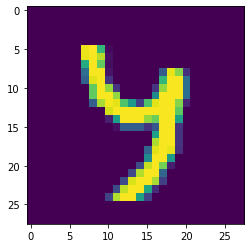

In [51]:
i=12
plt.imshow(Xt[i]);
print(ytest_pred[i])

In [55]:
img_id=list(range(1,len(ytest_pred)+1))

In [60]:
df_pred=pd.DataFrame({"ImageId":img_id, "Label":ytest_pred})
df_pred=df_pred.set_index('ImageId')

In [62]:
df_pred.to_csv("iop_submision_VGG16modif.csv")